# Chapter 1: Statistical Analysis in Soccer

This notebook demonstrates statistical analysis techniques in soccer using R, including:
- Data visualization of EPL champions
- Manager performance comparison
- Points vs Shots analysis
- Betting odds analysis
- Tournament simulation

## 1. EPL Champions Analysis (1992-2021)

This section demonstrates basic data visualization in R using Premier League champions data.

             Clubs Titles
1          Arsenal      3
2 Blackburn Rovers      1
3          Chelsea      5
4   Leicester City      1
5        Liverpool      1
6         Man City      6
7       Man United     13


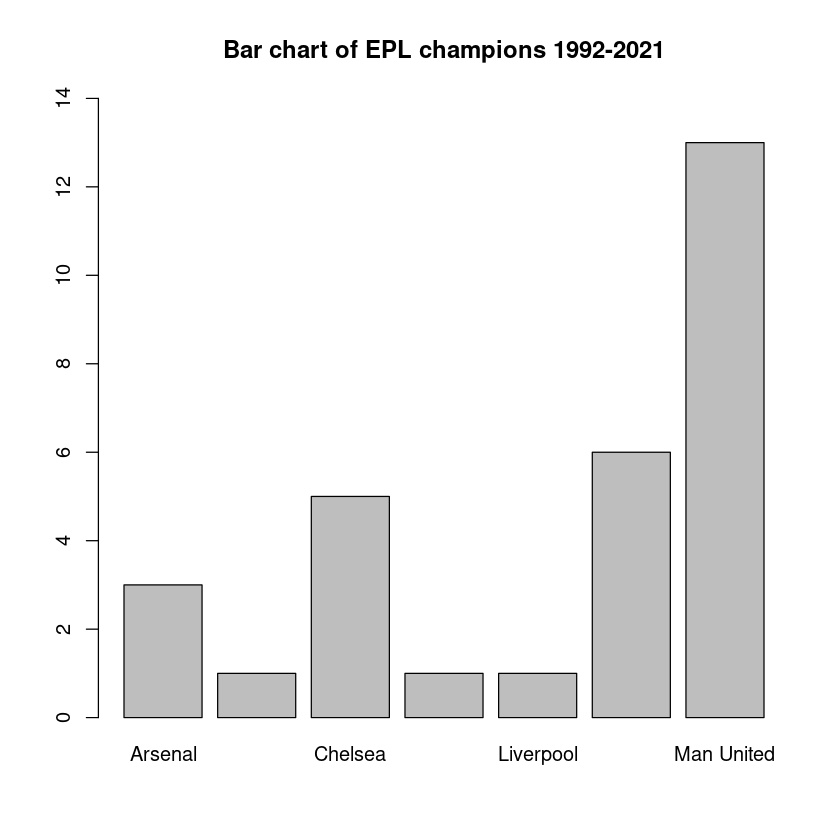

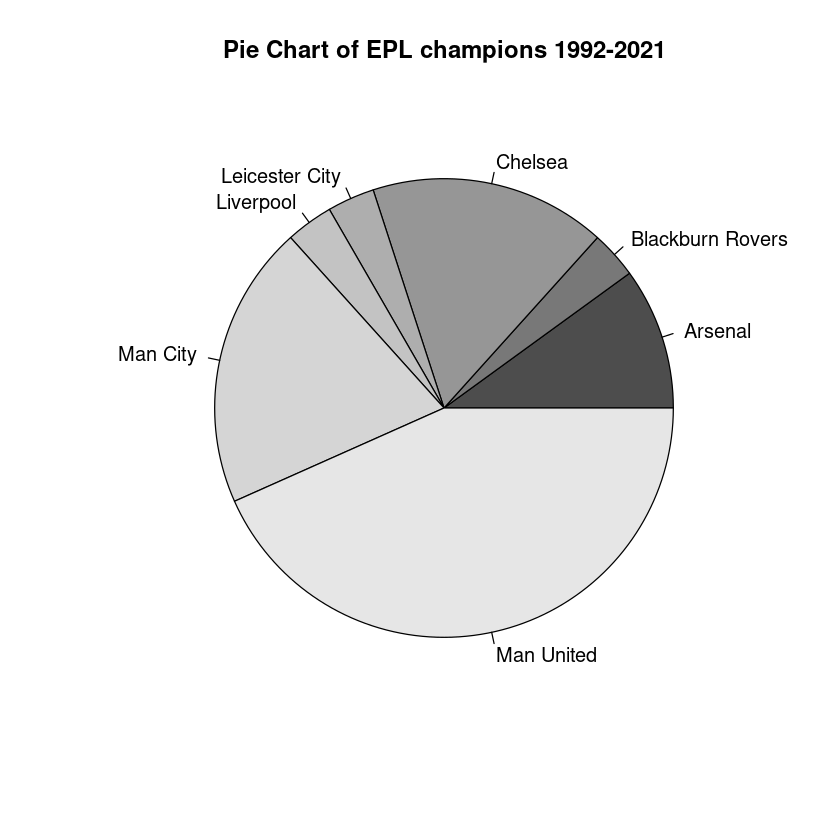

In [1]:
# Create vectors for clubs and their titles
Clubs <- c("Arsenal","Blackburn Rovers","Chelsea","Leicester City","Liverpool","Man City","Man United")
Titles <- c(3,1,5,1,1,6,13)
epl.dat <- cbind.data.frame(Clubs,Titles)
print(epl.dat)

# Bar plot
barplot(epl.dat$Titles, names.arg=epl.dat$Clubs, ylim=c(0,14))
title("Bar chart of EPL champions 1992-2021")

# Pie chart
colours = gray.colors(length(epl.dat$Clubs))
pie(Titles, labels = Clubs , col=colours,main="Pie Chart of EPL champions 1992-2021")

Key concepts:
- Data organization using vectors and data frames
- Basic bar plot visualization using `barplot()`
- Pie chart representation with grayscale colors using `pie()`
- Data combination using `cbind.data.frame()`

## 2. Manager Performance Comparison

Statistical comparison of Manchester United managers using Chi-square test.

In [2]:
# Create vectors for manager statistics
Manager <- c("Ferguson","Moyes","van Gaal","Mourinho","Solskjaer","Rangnick")
Wins <- c(895,27,54,84,91,11)
Draws <- c(338,9,25,32,37,10)
Losses <- c(267,15,24,28,40,8)

mu.record <- cbind.data.frame(Manager,Wins,Draws,Losses)
print(mu.record)

# Compare Ferguson vs Rangnick
man1 <- "Ferguson"
man2 <- "Rangnick"

Manager1 <- mu.record[mu.record$Manager == man1,]   
Manager2 <- mu.record[mu.record$Manager == man2,]   

# Create a contingency table
temp = as.matrix(rbind(Manager1[,c(2:4)], Manager2[,c(2:4)]))
ContTab <- as.table(temp)
dimnames(ContTab) = list(Manager = c("Manager 1", "Manager 2"),
                         Outcome = c("Wins","Draws", "Loses"))
print(ContTab)

# Perform Chi-square test
chsqRes = chisq.test(ContTab)
print(chsqRes)

    Manager Wins Draws Losses
1  Ferguson  895   338    267
2     Moyes   27     9     15
3  van Gaal   54    25     24
4  Mourinho   84    32     28
5 Solskjaer   91    37     40
6  Rangnick   11    10      8
           Outcome
Manager     Wins Draws Loses
  Manager 1  895   338   267
  Manager 2   11    10     8
           Outcome
Manager     Wins Draws Loses
  Manager 1  895   338   267
  Manager 2   11    10     8

	Pearson's Chi-squared test

data:  ContTab
X-squared = 5.5681, df = 2, p-value = 0.06179


	Pearson's Chi-squared test

data:  ContTab
X-squared = 5.5681, df = 2, p-value = 0.06179



Key insights:
- Comprehensive comparison between different managers (e.g., Ferguson vs Rangnick)
- Analysis of Wins, Draws, and Losses using contingency tables
- Statistical significance testing using Chi-square test
- Data subsetting and manipulation techniques

## 3. Points vs Shots Analysis (2020-21 Season)

Linear regression analysis examining the relationship between shots taken and points achieved.

,Points,Shots
,<dbl>,<dbl>
1,61,455
2,55,518
3,41,476
4,39,383
5,67,553
6,44,346



Call:
lm(formula = Points ~ Shots, data = data.frame(dat2020))

Residuals:
    Min      1Q  Median      3Q     Max 
-22.430  -7.576  -2.039  10.446  15.977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.9996    14.3042  -1.538    0.141    
Shots         0.1646     0.0310   5.309 4.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.83 on 18 degrees of freedom
Multiple R-squared:  0.6103,	Adjusted R-squared:  0.5886 
F-statistic: 28.19 on 1 and 18 DF,  p-value: 4.776e-05


      1 
74.2991 
       1 
93.88807 
       1 
39.56571 


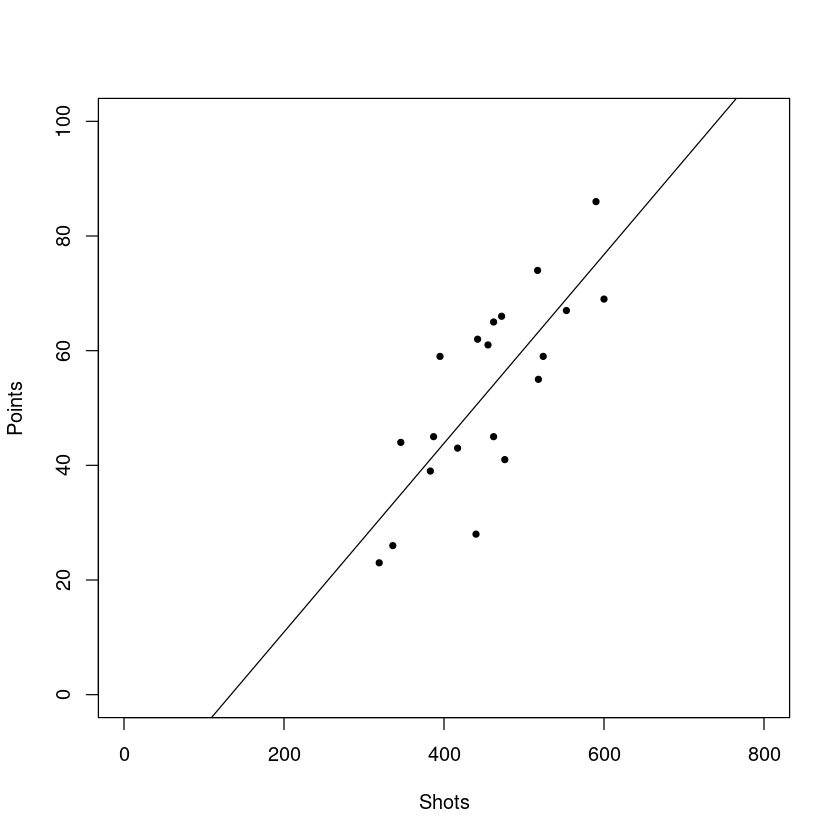

In [3]:
# Create data vectors
Points <- c(61, 55, 41, 39, 67, 44, 59, 28, 59, 66, 69, 86, 74, 45, 23, 43, 62, 26, 65, 45)
Shots <- c(455,518,476,383,553,346,395,440,524,472,600,590,517,387,319,417,442,336,462,462)

dat2020 <- cbind.data.frame(Points, Shots)
head(dat2020)  # Display first 6 rows

# Build OLS regression model
mod2020 <- lm(Points ~ Shots, data = data.frame(dat2020))
summary(mod2020)

# Create scatter plot with best-fit line
plot(dat2020$Shots, dat2020$Points, pch=20, col="black", xlim=c(0,800), 
     ylim=c(0,100), ylab="Points", xlab="Shots")
abline(lm(dat2020$Points ~ dat2020$Shots), lty=1)

# Predictions for 2021-22 season
# Chelsea (585 shots)
ChelPts.2021 <- predict(mod2020, list(Shots=585))
print(ChelPts.2021)

# Manchester City (704 shots)
MCPts.2021 <- predict(mod2020, list(Shots=704))
print(MCPts.2021)

# Norwich City (374 shots)
NCPts.2021 <- predict(mod2020, list(Shots=374))
print(NCPts.2021)

Key concepts:
- Linear regression modeling using `lm()`
- Predictive analytics with `predict()`
- Data visualization with scatter plots and best-fit lines
- Model application to real-world predictions

## 4. Betting Odds Analysis

Analysis of betting odds from different bookmakers (William Hill and Pinnacle).

In [4]:
# William Hill match odds
wh_hwodds <- 2.15 # Odds for home win
wh_dodds <- 3.30 # Odds for draw
wh_awodds <- 3.50 # Odds for away win

# Pinnacle match odds
p_hwodds <- 2.13 # Odds for home win
p_dodds <- 3.61 # Odds for draw
p_awodds <- 3.64 # Odds for away win

# Compile odds into data frame
WH_odds <- c(wh_hwodds,wh_dodds,wh_awodds)
Pin_odds <- c(p_hwodds,p_dodds,p_awodds)
bet.dat <- cbind.data.frame(WH_odds,Pin_odds)

# Calculate implied probabilities
bet.dat$WH_prob <- round(1/bet.dat$WH_odds,3)
bet.dat$Pin_prob <- round(1/bet.dat$Pin_odds,3)
rownames(bet.dat) <- c("Home win","Draw","Away win")
print(bet.dat)

# Calculate over-rounds
WH_or <- sum(bet.dat$WH_prob)-1
print(WH_or)  # William Hill's over-round

Pin_or <- sum(bet.dat$Pin_prob)-1
print(Pin_or)  # Pinnacle's over-round

# Calculate potential profit
wager <- 10 # £10 wager with WH on Tottenham to win
profit <- wager * (wh_hwodds-1)
print(profit)

         WH_odds Pin_odds WH_prob Pin_prob
Home win    2.15     2.13   0.465    0.469
Draw        3.30     3.61   0.303    0.277
Away win    3.50     3.64   0.286    0.275
[1] 0.054
[1] 0.021
[1] 11.5


Concepts covered:
- Odds representation and manipulation
- Implied probability calculation
- Over-round calculation (bookmaker's margin)
- Profit calculation on potential wagers
- Comparison of different bookmakers' odds

## 5. Cup Draw Simulation

Demonstration of tournament draw simulation using random sampling in R.

In [5]:
# Create vector of team numbers
teams <- c(1:16)
print(teams)

# Create matrix to store results
cup.draw <- as.data.frame(matrix(0,8,2))
colnames(cup.draw) <- c("HomeTeam", "AwayTeam")

# Randomly sample eight home teams
set.seed(123) # Makes draw results repeatable
samp.HT <- sample(teams, size=8, replace=FALSE)
samp.AT <- sample(teams[-samp.HT])

# Assign teams to draw
cup.draw$HomeTeam <- samp.HT
cup.draw$AwayTeam <- samp.AT
print(cup.draw)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
  HomeTeam AwayTeam
1       15        8
2       16       11
3        3       12
4       14        1
5       10        4
6        2        7
7        6       13
8        5        9


Key features:
- 16-team tournament simulation
- Random assignment of home/away teams using `sample()`
- Matrix manipulation for results storage
- Reproducible results using `set.seed()`
- Data frame creation and column naming

---

## Summary of Key R Concepts Covered

1. Data Structures:
   - Vectors (`c()`)
   - Data frames (`data.frame()`, `cbind.data.frame()`)
   - Matrices (`matrix()`)
   - Tables (`as.table()`)

2. Statistical Analysis:
   - Chi-square testing (`chisq.test()`)
   - Linear regression (`lm()`)
   - Predictive modeling (`predict()`)

3. Data Visualization:
   - Bar plots (`barplot()`)
   - Pie charts (`pie()`)
   - Scatter plots (`plot()`)
   - Best fit lines (`abline()`)

4. Data Management:
   - Random sampling (`sample()`)
   - Matrix manipulation
   - Data frame operations
   - Probability calculations

5. Applied Mathematics:
   - Sports betting calculations
   - Statistical inference
   - Probability analysis
   - Tournament simulations